<a href="https://colab.research.google.com/github/magcid/visaoComputacional/blob/main/T1-Componentes_de_Interface_HoG%2BSVM_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivo e Descrição

A partir do screenshots de Apps, detectar o layout de elementos de GUI.

Usar HoG para identificar componentes:
HoG - Histograma de gradientes orientados.
Para identificar componentes:
Iniciar com back propagation simples. SVM multi-classes se não funcionar.


Iniciaremos identificando alguns componentes. Se guncionar bem temos interesse em:
Design de Interface
--Button
--CheckBox
--DatePicker
--Image
--BackgroundImage
--Label
--ListPicker
--ListView
--Notifier
--PasswordTextBox
--Slider
--Spinner
--Switch
--TextBox
--TimePicker
--WebViewer
Maps
--Map
Multimédia
--ImagePicker
--VideoPlayer



# Importação das Bibliotecas

In [ ]:
from skimage.feature import hog
from skimage import color
from sklearn import svm, metrics
from sklearn.metrics import classification_report,accuracy_score
from google.colab import drive
import cv2 as cv
import glob
from matplotlib import pyplot as plt
import numpy as np
from skimage import exposure
import pandas as pd

# Preparação do Dataset


Obtenção das imagens para gerar o Histograma de gradientes - HOG

No meu caso, estão em uma pasta do meu Google Drive

In [ ]:
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/Doutorado/Disciplinas/Visão Computacional/T1/DatasetMarcelo"

BackgroundImage  EmailPicker  ListPicker  PasswordTextBox    Switch
Button		 Image	      ListView	  PhoneNumberPicker  TextBox
CheckBox	 ImagePicker  Map	  Slider	     TimePicker
DatePicker	 Label	      Notifier	  Spinner	     WebViewer


Pega uma imagem e faz alguns testes com HoG (Poderia ser excluído, para testes apenas).  
* Converte para cinza 
* redimenciona.
* Visualizar uma imagem e seu HOG.




[0.00298468 0.         0.00738671 ... 0.00130743 0.         0.        ]


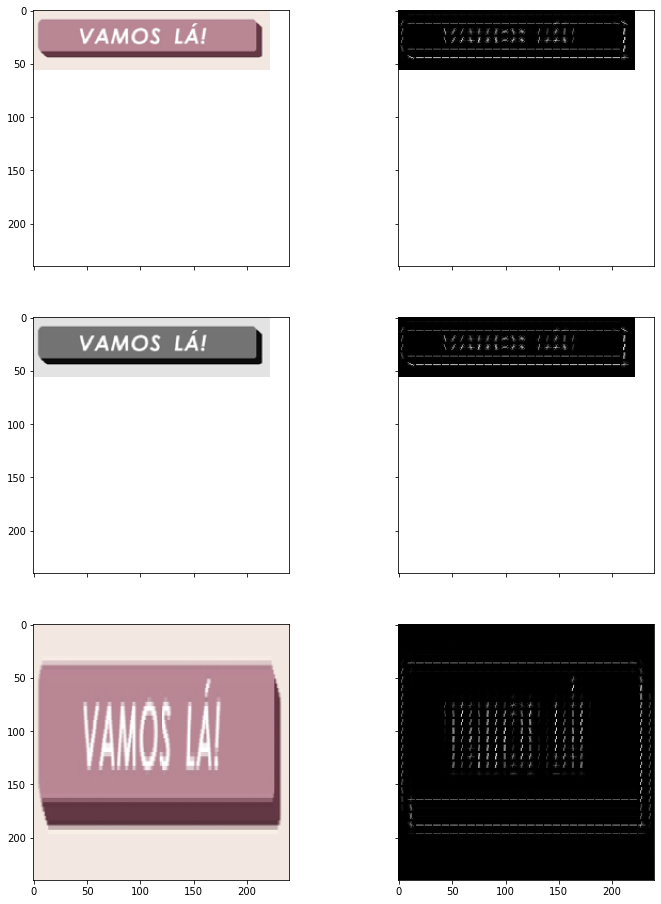

In [ ]:
from skimage import exposure
#Carrega a imagem
p = "/content/gdrive/My Drive/Doutorado/Disciplinas/Visão Computacional/T1/DatasetMarcelo/Button"
aimage = cv.imread(p+'/a.png')
data = np.array(aimage).astype('uint8')
#Converte para Cinza
aimageGray = color.rgb2gray(aimage)
#Hog colorido
fd, aimageHoG = hog(aimage, visualize=True)
aimageHoG_rescaled = exposure.rescale_intensity(aimageHoG) #Necessário somente para exibir
#Hog Cinza
fd2, aimageGrayHoG = hog(aimageGray, visualize=True)
aimageGrayHoG_rescaled = exposure.rescale_intensity(aimageGrayHoG)

#Regimensionando a imagem para um tamanho padrão.
dim = (240, 240)
aimageResized = cv.resize(aimage, dim, interpolation = cv.INTER_AREA)
#Hog Imagem redimencionada
fd3, aimageResizedHoG = hog(aimageResized, visualize=True)
aimageResizedHoG_rescaled = exposure.rescale_intensity(aimageResizedHoG)

# Plotagem das figuras
fig, axes = plt.subplots(3, 2, figsize=(12, 16), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(aimage)
ax[1].imshow(aimageHoG_rescaled, 'gray')
ax[2].imshow(aimageGray, 'gray')
ax[3].imshow(aimageGrayHoG_rescaled, 'gray')
ax[4].imshow(aimageResized)
ax[5].imshow(aimageResizedHoG_rescaled, 'gray')
print(fd)

In [ ]:
hist = None
rotulos = None
hog_images = None
hog_features = None

#variaveis
hog_images = [] #HOGs
hog_features = []
rotulos = []  #classes

#Criei uma função para adicionar os dados de um arquivo ao DataSet usando HoG
def adicionaElementoDataset (file, himages, hfeatures, rotulos, rotulo):
    img = cv.imread(file, 1)
    #Regimensionando a imagem para um tamanho padrão.
    dim = (240, 240)
    imgR = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    ft, imgHist = hog(imgR,visualize=True)
    himages.append(imgHist)
    hfeatures.append(ft)
    rotulos.append(rotulo)


#Adiciona as imagens do DataSet usando os diretórios como rótulo
#Todos os arquivos dentro da pasta devem ser de imagens
import os
pasta = "/content/gdrive/My Drive/Doutorado/Disciplinas/Visão Computacional/T1/DatasetMarcelo/"
subpastas = os.listdir(pasta)
for s in subpastas:
    #print(s)
    with os.scandir(pasta+s) as it:
        for entry in it:
            if not entry.name.startswith('.') and entry.is_file():
                adicionaElementoDataset(entry.path, hog_images, hog_features, rotulos, s)

Visualizando as informações importadas dos diretórios acima

In [ ]:
rotulos

['CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'CheckBox',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'Map',
 'M

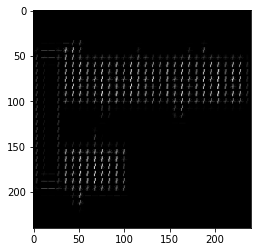

In [ ]:
#mostrando o HoG de um Botão
plt.imshow(exposure.rescale_intensity(hog_images[0]), 'gray')

In [ ]:
hog_features

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.57735027, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.57735027, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.57735027, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0

#Treinamento do modelo SVM

* Criando o modelo
* Embaralhando os dados...

In [ ]:
# Cria um novo modelo
um_svm = svm.SVC()
#prepara o formato dos dados
hog_features = np.array(hog_features)
labels =  np.array(rotulos).reshape(len(rotulos),1)
data_frame = np.hstack((hog_features, labels))
#Embaralha
np.random.shuffle(data_frame)

Separa os dados que serão usados para:
* treino 
* Teste

In [ ]:
percentual = 80
partition = int(len(hog_features)*percentual/100)
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

Realiza o treinamento propriamente dito

In [ ]:
um_svm.fit(x_train,y_train)

SVC()

# Teste


Acurácia

In [ ]:
y_pred = um_svm.predict(x_test)
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.6296296296296297


                 precision    recall  f1-score   support

BackgroundImage       0.00      0.00      0.00         5
         Button       0.65      0.65      0.65        26
       CheckBox       1.00      0.80      0.89        15
    EmailPicker       1.00      0.25      0.40         4
          Image       0.41      0.81      0.54        16
    ImagePicker       0.00      0.00      0.00         2
          Label       0.74      0.85      0.79        20
     ListPicker       0.00      0.00      0.00         3
       ListView       0.75      0.50      0.60         6
            Map       0.00      0.00      0.00         2
PasswordTextBox       0.00      0.00      0.00         3
        Spinner       0.50      1.00      0.67         4
         Switch       0.00      0.00      0.00         2
        TextBox       0.62      0.95      0.75        19
     TimePicker       0.00      0.00      0.00         6
      WebViewer       0.00      0.00      0.00         2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de Confusão

Confusion matrix:
[[ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  6  0  2  0  0  0  0  1  0  0  0  0]
 [ 0  0 12  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  2  0  0 13  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  3  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0 18  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  1  0  2  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]]


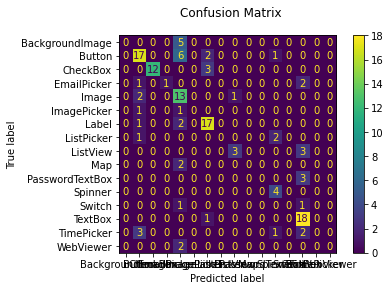

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()